## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [2]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# So here in this Dataset.. My end Aim is to Predict the "Flight Price "..Based on All this Features Which are Avavalible , you have to "Predict the Prise "
# This Dataset is Quite good To , Understand "EDA".. in Depth and Very Smooth 

In [5]:
df=pd.read_excel('flight_price.xlsx') # Since , it is an "Excel File" so You need to Read this File wrt to (Excel)
df.head()
# Here are Total 6 (Features/ Columns) are  in the form of "Categorical Data" are (Source, Destination,Route,Airline,Duration,Additional_info)
# We will see one-by-one Each Column and try to do Analysis on them and Figure out   

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [109]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
## get the basics info about data
df.info()
# Here are Total 9 Columns are of Type "Object"..that means "Strings"..... Object type ka Meaning hota hai "Strings".......(OBJECT KA MEANING HOTA HAI "STRINGS")
# ML model Does not Understand The language of "Strings",,i.e is "Object".. ML model Only understands the language of "Numbers"...  so We need to Convert this "Object".. which is in the form of "Categorical Data "..We need to Convert them into "Numeric Data "
# Becoz, Numeric Data is Understandable by ML model... .. Also Numeric Data is the Data Which is in the form of "Integer" or "Float"
# So here 9 Columns are of "Categorical Data" and 1 Column is of "Numeric Data "

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
## Feature Engineering
# So 1st Categorical Column is "Date_of_journey"... We can Split this Date into there (Date) ,(Month),(Year).. By using Python Programming Lanuage and Split functions 

df['Date']=df['Date_of_Journey'].str.split('/').str[0]
# Here I am Creating a New-Column and In that Column  I am Storing All my (Dates).. Which exit in this Dataset One -by one ..
# Here I am Seprating Dates by Using "Split" function where I am Providing Split by ("/") this symbol.... In that also I am Accesing Only [0] 0th index .... which is "Date"
# This  df['Date'] will stored Date of Each Journey  


In [14]:
df['Date']

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date, Length: 10683, dtype: object

In [16]:
### Similarly , As Date we can Seprate out "Month" as well as "Year"... by Accesing index [1] and [2]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]


In [17]:
df['Month']

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Month, Length: 10683, dtype: object

In [18]:
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [19]:
df['Year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Year, Length: 10683, dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [21]:
# NOTE :- THERE IS ONE PROBLEM HERE WHATEVER 3 DIFFRENT NEW COLUMN I HAVE MADE JUST NOW FOR (DATE , MONTH , YEAR) ARE HERE AGAIN STORED IN THE FORM OF "OBJECT"..
# WOh log Vapas Strings kai Form mai hi aa gaye .. We need to Convert them From (OBJECT --> INEGERE/FLOAT)...SO THAT THIS "Categorical data" will Sucesfullly Convert to "Numeric Data"..
# For that we are using "Typecasting" here from ("Strings to Inetger")...

In [22]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

# Now if you will see the "DType" of that All "New-Column "Which We have Created we have Successfully Convert All the "Categorical data" into the "Numeric Data" for "Date_of_Journey this Coilomn "

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [24]:
# NOW YOU CAN SAY KI MAIN JO 6 CATEGORICAL COLUMNS THE UNMAISAI HUMNE EK KO NUMERIC BANA DIYA....THAT MEANS NOW "Date_of_journey"
# This Column is now Ready to Give to "ML model " for Prediction , Becoz now ML Model will defenetly Easily Handle and do the Prediction for "Date_of_journey"
# Becoz Humne usko Numeric mai Convert kar diya

In [31]:
## Drop Date Of Journey

df.drop('Date_of_Journey',axis=1,inplace=True) # In-place =True to permanantely
## Now Because This Column is Suuccesfully Converted to "Numeric" form ..is ready to send to ML Model for Prediction ... for Now wrt to "Data-Analysis"
# and "EDA" we do not want this model now in this Dataset.. we will Remove it Permentely.. and will work on Remaining "Categorical Columns " and try to Convert them into "Numeric"

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [34]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [36]:
# Now it's time to Convert next Categorical Column which is "Arrival Time "...If you can see Here that, In Arrival Time, there is Date is also mentioned after the 'Time' (eg. 01:10 22 Mar).. so Don't want Data..in Arrival Time 
# SO in-oder to get onlt Time and not date.. we are using ("lambda") function here , to Get Only "Time" , not "Date"...
# What we are doing here in this.."We are trying to split out the Date.. From Arrival Time by using "Split" function .."..
# Here ,In  Arrival_Time Date is get Split on the basis of Space ..(There is a Space after Time).. so Date is get Separated and In "Arriva_time Column " only "Time"is Reaming..Date we will  not Cinsider 

df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [39]:
df['Arrival_Time']
# Here you can see All Time is get Printed and All date is Get Reducted we have alredy Convert Date, its time to Convert "Time "

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [41]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
# So here in "Arrival_hour" only hour is get Printed .. from that Time 

In [42]:
df['Arrival_hour']

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_hour, Length: 10683, dtype: object

In [43]:
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [44]:
df['Arrival_min']
# So here in "Arrival_min" only min is get Printed .. from that Time 

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_min, Length: 10683, dtype: object

In [45]:
# SUMARY :- 1) 1ST WE REDUCTED DATE FROM ARRIVAL_TIME
           #2) 2ND WE SEPARETD HOUR AND MIN
            # 3) WE PRINT SEPARATELY ARRIVAL_TIME - ARRIVAL_HOUR - ARRIVAL_MIN

In [48]:
df.head(2)
# As you can see All changes over Here ...
# Two new Column Are get Created .. they are  Arrival_hour and Arrival_min
# Also Arrival_time is get Updated...Date is get Reducted  

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [49]:
df.shape

(10683, 15)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Arrival_hour     10683 non-null  object
 14  Arrival_min      10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [51]:
## As you Can see , The Two Column which  are Creted (Arrival_hour and Arrival_min) are of [Dtype:- Object(String) ]... We need to convert them to Numeric 
## For that we are using TypeCasting here to convert [Categorical Data --> Numeric Data]

In [52]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [54]:
df.info() # Now you can see the Updation in the Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


In [55]:
df.drop('Arrival_Time',axis=1,inplace=True) # Once we have Convert the "Arrival-Time " into "Arrival"-Hour and "Arrival-min".. do not need to Specifi any usecase for 
# " Arrival Time " so remove it permanantely 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [57]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [68]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [59]:
## AS WE ARE DOING FROM STARTING HERE IT'S TIME FOR NEW CATEGORICAL COLUMN 
# "Dep_Time"... Is also convert into :- "Departure_hour" and "Depatre_min"..get separted by Split function and Symbol (":")...where [0] th index is the "Hour" and [1]th index is the "min"
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]


In [60]:
df['Departure_hour']

0        22
1        05
2        09
3        18
4        16
         ..
10678    19
10679    20
10680    08
10681    11
10682    10
Name: Departure_hour, Length: 10683, dtype: object

In [61]:
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]

In [62]:
df['Departure_min']

0        20
1        50
2        25
3        05
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Departure_min, Length: 10683, dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
 14  Departure_hour   10683 non-null  object
 15  Departure_min    10683 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.3+ MB


In [67]:
## BOTH THE NEW COLOUMN S ARE IN THE (Dtype :- Object) need to convert to Numeric so , Here we could done that using "Typecasting"
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_min']=df['Departure_min'].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
 14  Departure_hour   10683 non-null  int64 
 15  Departure_min    10683 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [69]:
df.drop('Dep_Time',axis=1,inplace=True) # Once we Complete with the "Departure_time"...we acn remove it ... becoz we have created 2 new Columns for that 

In [70]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [71]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [73]:
df[df['Total_Stops'].isnull()]
# Here is Missing Value is their In this Position , in this Column

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


<Axes: xlabel='Total_Stops', ylabel='Count'>

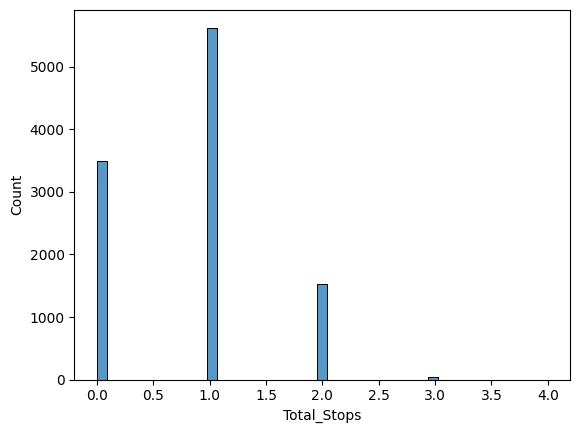

In [90]:
# Create a bar plot
sns.histplot(df['Total_Stops'])


In [91]:
# So Here we are  Handling Missing Values in "Total_stops" in this Categorical Columns , with "Mode" Technique.... Where we Pick-up unique /most -relevent  randome Element and replace with all Missing Values in the "Column"
df['Total_Stops'].mode()

0    1
Name: Total_Stops, dtype: int64

In [86]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [100]:
## Here I am Trying to Apply Labels to my "Categorical Data ", so that what happened My Categorical Data will convert into Numeric 
# as you can see I am Assigned an Integer Label to Every "Categorical Value " 
"""
non-stop -:0
1 stop :- 1
2 stop:- 2...Here I am Converting my Categorical data Into Numeric.... So It is useful for ML model to do Prediction and Analysis
"""
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})
# So Here I am Assigning each Unique Data-points with "Number of stops"..for Nan :- 1 stop ,, Because:- My Mode for the Column is 1... So We are placing 1 to All Missing Values

In [96]:
df[df['Total_Stops'].isnull()]
# Since we have fill All the Missing Values to 1 stop.. There is No Any missing Value now ..

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


In [97]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,1,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1,No info,7662,1,5,2019,13,15,5,50


In [ ]:
df.drop('Route',axis=1,inplace=True) # as we have Source and Destination so didn't want This Route we can Simply "Delete this Route"

In [99]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,1,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1,No info,7662,1,5,2019,13,15,5,50


In [104]:
## So Now Next is Duration, we can ... Separet Duration into : Hour and Min 

In [105]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [106]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0] # Separate By "h" and print the Zero th index

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [111]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [112]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [113]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [114]:
from sklearn.preprocessing import OneHotEncoder

In [115]:
encoder=OneHotEncoder()

In [116]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(10683, 23))

In [117]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
